In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Crimes_-_2001_to_Present_20231108.csv')
df.shape

(7930146, 30)

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,512,5.0,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)",22.0,14309.0,38.0,92.0,36.0,46.0,22.0,79.0
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1225,12.0,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)",48.0,21184.0,29.0,766.0,46.0,28.0,15.0,139.0
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,333,3.0,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)",32.0,22538.0,39.0,419.0,37.0,24.0,18.0,89.0


In [4]:
df.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards',
       'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats'],
      dtype=object)

In [5]:
df.isnull().sum()

ID                                 0
Case Number                        0
Date                               0
Block                              0
IUCR                               0
Primary Type                       0
Description                        0
Location Description           11999
Arrest                             0
Domestic                           0
Beat                               0
District                          47
Ward                          614853
Community Area                613477
FBI Code                           0
X Coordinate                   89407
Y Coordinate                   89407
Year                               0
Updated On                         0
Latitude                       89407
Longitude                      89407
Location                       89407
Historical Wards 2003-2015    112668
Zip Codes                      89407
Community Areas               109507
Census Tracts                 107437
Wards                         109386
B

In [6]:
#Could maybe look further into the descriptions for analysis 
df['Description'].value_counts(normalize=True).sort_values(ascending=False) * 100

Description
SIMPLE                                        11.731991
$500 AND UNDER                                 8.087682
DOMESTIC BATTERY SIMPLE                        7.812832
TO VEHICLE                                     5.580137
OVER $500                                      5.378980
                                                ...    
POSSESS - HYPODERMIC NEEDLE                    0.000013
SECOND DEGREE MURDER                           0.000013
FINANCIAL IDENTITY THEFT: $300 & UNDER         0.000013
DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION     0.000013
POSSESS - LOOK-ALIKE DRUGS                     0.000013
Name: proportion, Length: 550, dtype: float64

In [7]:
df['Primary Type'].value_counts(normalize=True).sort_values(ascending=False) * 100

Primary Type
THEFT                                21.108098
BATTERY                              18.257634
CRIMINAL DAMAGE                      11.399197
NARCOTICS                             9.461856
ASSAULT                               6.557483
OTHER OFFENSE                         6.203984
BURGLARY                              5.401641
MOTOR VEHICLE THEFT                   4.932885
DECEPTIVE PRACTICE                    4.471696
ROBBERY                               3.766728
CRIMINAL TRESPASS                     2.733455
WEAPONS VIOLATION                     1.403568
PROSTITUTION                          0.882039
OFFENSE INVOLVING CHILDREN            0.716178
PUBLIC PEACE VIOLATION                0.666116
SEX OFFENSE                           0.398139
CRIM SEXUAL ASSAULT                   0.347509
INTERFERENCE WITH PUBLIC OFFICER      0.235696
LIQUOR LAW VIOLATION                  0.189152
GAMBLING                              0.184486
ARSON                                 0.170741


In [8]:
df['Community Areas'].value_counts(normalize=True).sort_values(ascending=False) * 100

Community Areas
26.0    6.169726
37.0    3.573698
39.0    3.281676
24.0    3.129680
29.0    3.071194
25.0    2.979475
30.0    2.886516
65.0    2.860649
70.0    2.850688
45.0    2.661151
66.0    2.647328
38.0    2.461423
67.0    2.444941
64.0    2.422641
40.0    2.119724
23.0    2.115211
57.0    1.997893
59.0    1.978432
28.0    1.883094
19.0    1.853531
42.0    1.838034
27.0    1.830017
32.0    1.718402
9.0     1.697547
50.0    1.606211
68.0    1.554003
10.0    1.518687
31.0    1.507140
4.0     1.414475
15.0    1.280765
20.0    1.252315
72.0    1.183075
1.0     1.164560
16.0    1.143756
7.0     1.056205
76.0    1.016822
55.0    0.984434
33.0    0.959819
61.0    0.913455
22.0    0.909875
14.0    0.894671
69.0    0.886871
53.0    0.832208
34.0    0.789616
74.0    0.782506
6.0     0.751064
63.0    0.726450
48.0    0.663693
8.0     0.663526
58.0    0.640804
46.0    0.606344
5.0     0.596000
17.0    0.592445
44.0    0.585962
21.0    0.571398
75.0    0.541439
49.0    0.495215
41.0    0.47168

In [9]:
#Creating a new variable to start cleaning dataframe
clean_df = df

#Changing dates in 'Date' and 'Updated On' columns to datetime format
clean_df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
clean_df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p')

In [10]:
clean_df.head(8)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5741943,HN549294,2007-08-25 09:22:18,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,2015-08-17 15:03:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930689,HH109118,2002-01-05 21:24:00,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,512,5.0,NaN,NaN,06,NaN,NaN,2002,2016-02-04 06:33:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,14,1174694.0,1901831.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)",22.0,14309.0,38.0,92.0,36.0,46.0,22.0,79.0
3,13210088,JG423627,2023-08-31 12:00:00,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1225,12.0,27.0,28.0,11,1160870.0,1898642.0,2023,2023-09-16 15:41:56,41.877565,-87.684791,"(41.877565108, -87.68479102)",48.0,21184.0,29.0,766.0,46.0,28.0,15.0,139.0
4,13210004,JG422532,2023-07-24 21:45:00,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,333,3.0,7.0,43.0,02,1190812.0,1856743.0,2023,2023-09-16 15:41:56,41.761919,-87.576209,"(41.7619185, -87.576209245)",32.0,22538.0,39.0,419.0,37.0,24.0,18.0,89.0
5,13210062,JG423596,2023-08-27 07:00:00,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,1732,17.0,30.0,21.0,06,1151117.0,1922554.0,2023,2023-09-16 15:41:56,41.943379,-87.719974,"(41.943378528, -87.7199738)",27.0,21538.0,22.0,138.0,21.0,39.0,1.0,20.0
6,13210107,JG411849,2023-09-04 21:30:00,053XX S HOMAN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,822,8.0,14.0,63.0,14,1154617.0,1869046.0,2023,2023-09-16 15:41:56,41.796477,-87.708541,"(41.796477414, -87.708540915)",49.0,22248.0,61.0,776.0,8.0,56.0,13.0,129.0
7,13210060,JG423567,2023-08-15 14:20:00,077XX S SPAULDING AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,False,835,8.0,18.0,70.0,06,1155724.0,1853097.0,2023,2023-09-16 15:41:56,41.752689,-87.704909,"(41.752688801, -87.704908791)",6.0,4300.0,69.0,498.0,30.0,8.0,13.0,226.0


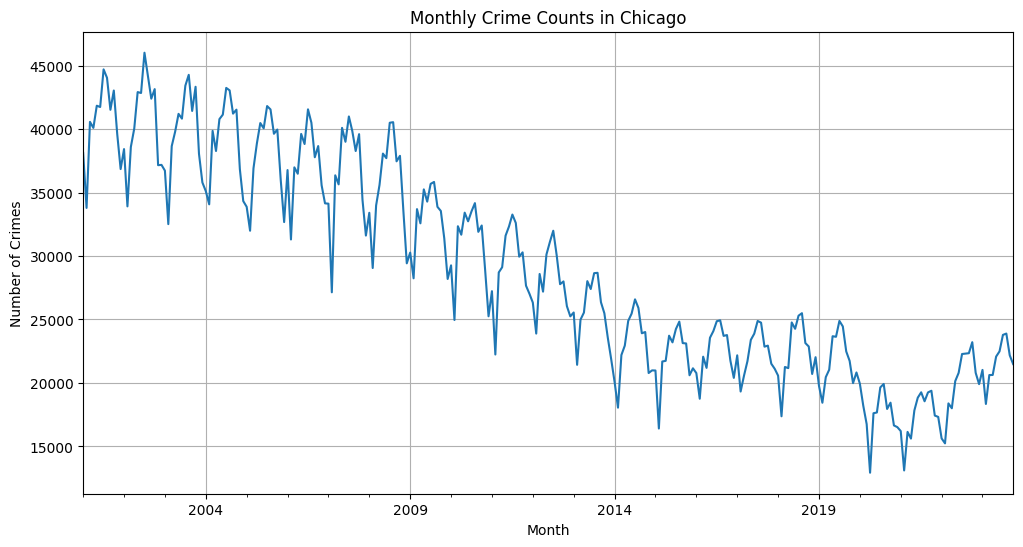

In [11]:
#Crime over time per month. 

# Resample the data to monthly frequency and count the number of crimes
monthly_crime_counts = clean_df.resample('M', on='Date').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_crime_counts.plot(kind='line')
plt.title('Monthly Crime Counts in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

#Interesting to see the very consistent upper and lower limits of every year

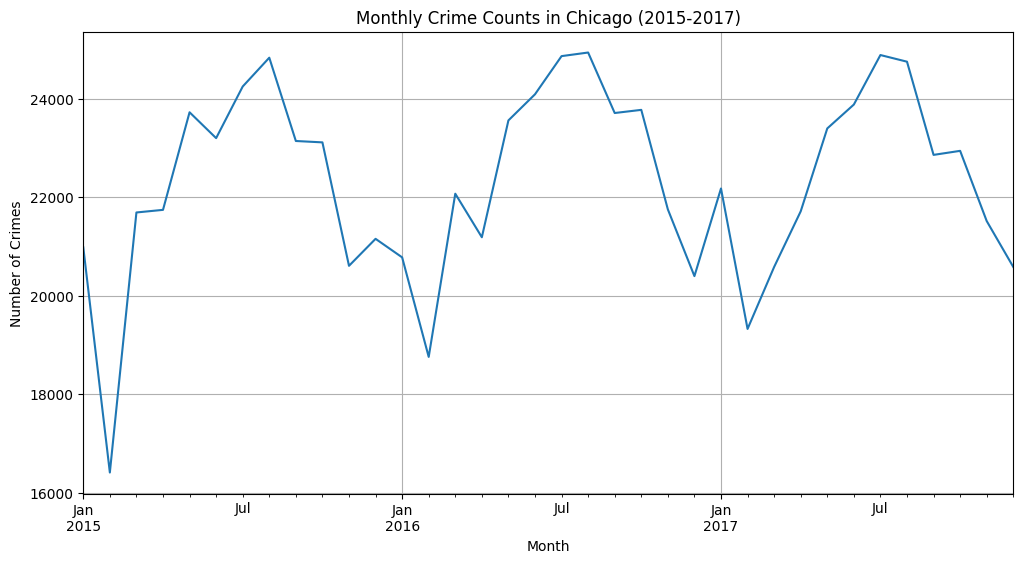

In [12]:
#Taking a closer look at crime rates that follow a yearly trend year to year. 


# Filter the data to include only dates between January 2015 and December 2017
start_date = '2015-01-01'
end_date = '2017-12-31'
filtered_crime_counts = clean_df[(clean_df['Date'] >= start_date) & (clean_df['Date'] <= end_date)].resample('M', on='Date').size()

# Plotting
plt.figure(figsize=(12, 6))
filtered_crime_counts.plot(kind='line')
plt.title('Monthly Crime Counts in Chicago (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()



In [ ]:
#Run this code when done cleaning. Will create new CSV from cleaned dataframe
clean_df.to_csv('Chicago_Crime_Data_Cleaned.csv', index=False)
